In [110]:
import pandas as pd

churn = pd.read_csv('Data.csv') 

# Data Exploration

In [111]:
churn.describe()

revenue      outcalls       incalls        months       eqpdays  \
count  31891.000000  31891.000000  31891.000000  31891.000000  31891.000000   
mean      58.665179     24.951385      8.065277     18.761908    391.222633   
std       44.163859     34.790147     16.610589      9.548019    254.998478   
min       -5.860000      0.000000      0.000000      6.000000     -5.000000   
25%       33.450000      3.000000      0.000000     11.000000    212.000000   
50%       48.380000     13.330000      2.000000     17.000000    341.000000   
75%       71.040000     33.330000      9.000000     24.000000    530.000000   
max      861.110000    610.330000    404.000000     60.000000   1812.000000   

             webcap      marryyes        travel         pcown      creditcd  \
count  31891.000000  31891.000000  31891.000000  31891.000000  31891.000000   
mean       0.894704      0.363175      0.057163      0.184817      0.676931   
std        0.306939      0.480922      0.232158      0.388155      0.467656   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000      1.000000   
75%        1.000000      1.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           retcalls      churndep  
count  31891.000000  31891.000000  
mean       0.044088      0.497162  
std        0.224552      0.500000  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        4.000000      1.000000

In [112]:
churn.isnull().any()

revenue     False
outcalls    False
incalls     False
months      False
eqpdays     False
webcap      False
marryyes    False
travel      False
pcown       False
creditcd    False
retcalls    False
churndep    False
dtype: bool

# Data Treatment 

In [113]:
#I noticed that there are negative values in revenue and eqpdays, which is impossible. 
#So I removed those inaccurate records.
churn1 = churn.drop(churn[churn.revenue < 0].index)
churn2 = churn1.drop(churn1[churn1.eqpdays < 0].index)

In [114]:
churn2.describe()

revenue      outcalls       incalls        months       eqpdays  \
count  31844.000000  31844.000000  31844.000000  31844.000000  31844.000000   
mean      58.622173     24.926872      8.052027     18.757097    391.789222   
std       44.101060     34.747400     16.543853      9.546107    254.746976   
min        0.000000      0.000000      0.000000      6.000000      0.000000   
25%       33.440000      3.000000      0.000000     11.000000    212.000000   
50%       48.335000     13.330000      2.000000     16.000000    341.000000   
75%       70.970000     33.330000      9.000000     24.000000    530.000000   
max      861.110000    610.330000    404.000000     60.000000   1812.000000   

             webcap      marryyes        travel         pcown      creditcd  \
count  31844.000000  31844.000000  31844.000000  31844.000000  31844.000000   
mean       0.894705      0.363177      0.057248      0.184933      0.677113   
std        0.306937      0.480923      0.232319      0.388249      0.467587   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000      1.000000   
75%        1.000000      1.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           retcalls      churndep  
count  31844.000000  31844.000000  
mean       0.043964      0.497362  
std        0.224189      0.500001  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        4.000000      1.000000

# Training and Visualizing a Decision Tree

In [115]:
X = pd.DataFrame(churn2, columns = ["revenue", "outcalls", 
                                   "incalls", "months",
                                   "eqpdays", "webcap", 
                                   "marryyes", "travel", 
                                   "pcown", "creditcd", "retcalls"])
y = pd.DataFrame(churn2, columns = ["churndep"])

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

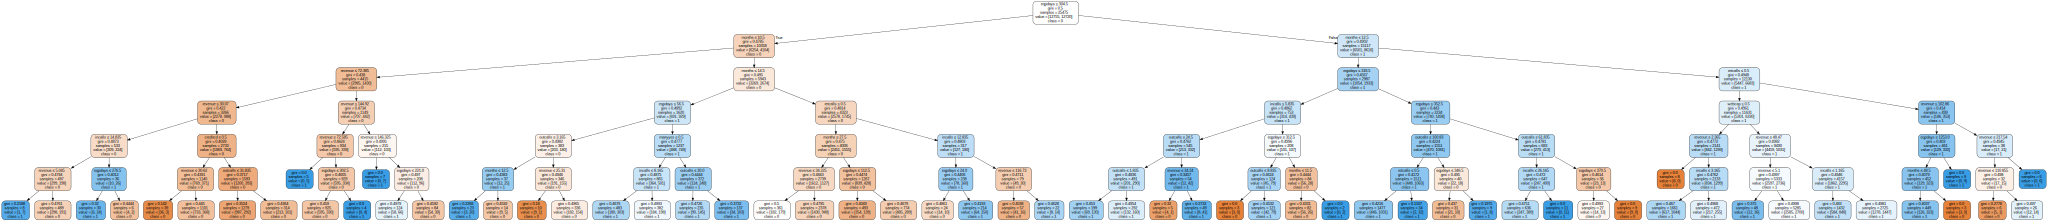

In [117]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 

# Gini-model
clf_gini = tree.DecisionTreeClassifier(max_depth=6)
clf_gini = clf_gini.fit(X_train, y_train)
feature_names = list(X.columns)
gini_tree = tree.export_graphviz(clf_gini, out_file=None,
                                feature_names=feature_names,
                                class_names='01',
                                filled=True, rounded=True,  
                                special_characters=True)

gini_graph = graphviz.Source(gini_tree) 
gini_graph

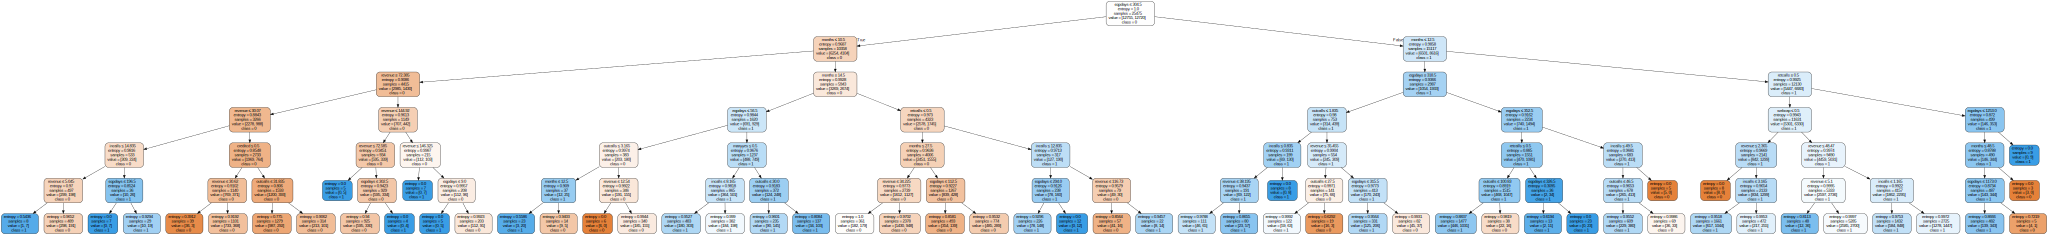

In [118]:
# Information gain
clf_infoG = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf_infoG = clf_infoG.fit(X_train, y_train)
feature_names = list(X.columns)
infoG_tree = tree.export_graphviz(clf_infoG, out_file=None,
                                feature_names=feature_names,
                                class_names='01',
                                filled=True, rounded=True,  
                                special_characters=True)

infoG_graph = graphviz.Source(infoG_tree) 
infoG_graph

# Model Evaluation

In [119]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1439 1812]
 [ 781 2337]]
Normalized confusion matrix
[[ 0.44  0.56]
 [ 0.25  0.75]]


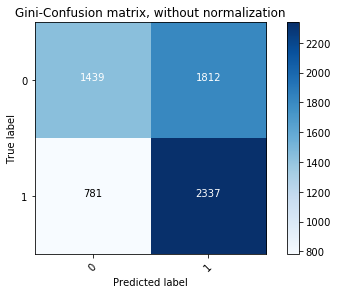

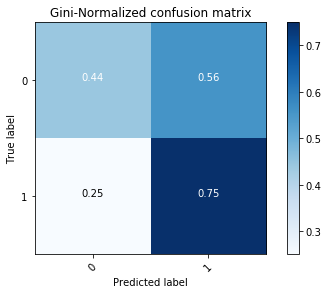

In [120]:
from sklearn.metrics import confusion_matrix

#gini model evaluation
y_pred_gini = clf_gini.fit(X_train, y_train).predict(X_test)               
gini_matrix = confusion_matrix(y_test, y_pred_gini)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(gini_matrix, classes='01',
                      title='Gini-Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(gini_matrix, classes='01', normalize=True,
                      title='Gini-Normalized confusion matrix')

plt.show()

In [121]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

gini_A = accuracy_score(y_test,y_pred_gini)
gini_P = precision_score(y_test,y_pred_gini)
gini_R = recall_score(y_test,y_pred_gini)
gini_F = f1_score(y_test,y_pred_gini)
gini_A

0.5928717224054012

In [122]:
gini_P

0.56326825741142439

In [123]:
gini_R

0.74951892238614493

In [124]:
gini_F

0.64318150543553032

In [134]:
gini_classfication_error = 1 - gini_A

In [135]:
gini_classfication_error 

0.4071282775945988

Confusion matrix, without normalization
[[1455 1796]
 [ 797 2321]]
Normalized confusion matrix
[[ 0.45  0.55]
 [ 0.26  0.74]]


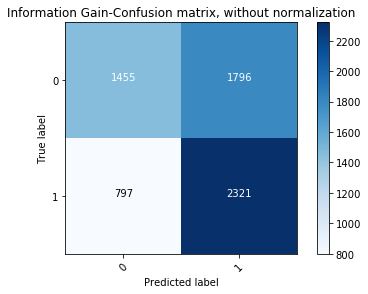

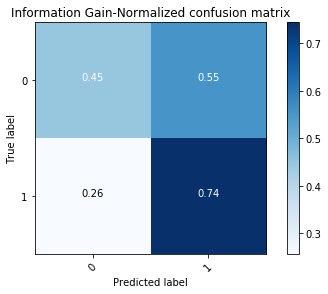

In [125]:
#information gain model evaluation
y_pred_infoG = clf_infoG.fit(X_train, y_train).predict(X_test)               
infoG_matrix = confusion_matrix(y_test, y_pred_infoG)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(infoG_matrix, classes='01',
                      title='Information Gain-Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(infoG_matrix, classes='01', normalize=True,
                      title='Information Gain-Normalized confusion matrix')

plt.show()

In [126]:
infoG_A = accuracy_score(y_test,y_pred_infoG)
infoG_P = precision_score(y_test,y_pred_infoG)
infoG_R = recall_score(y_test,y_pred_infoG)
infoG_F = f1_score(y_test,y_pred_infoG)
infoG_A

0.5928717224054012

In [127]:
infoG_P

0.56376001943162501

In [128]:
infoG_R

0.74438742783835787

In [129]:
infoG_F

0.64160331720801667

In [132]:
infoG_classfication_error = 1 - infoG_A

In [133]:
infoG_classfication_error

0.4071282775945988

# Overview and Interpret

When the criterion is gain_ratio, the F-measure is 0.6432.
When the criterion is information_gain, the F-measure is 0.6416.
So, I chose gini_ratio as the splitting criterion.

With the model I built, I can predict whether a customer will leave or not with given data. For example:
Suppose a consumer can be described as: 
"revenue = 50", "outcalls = 13", "incalls = 2", "months = 25",
"eqpdays = 270", "webcap = 1", "marryyes = 0", "travel = 0", 
"pcown = 0", "creditcd = 1", "retcalls = 3"

In [136]:
clf_gini.predict([[50, 13, 2, 25, 270, 1, 0, 0, 0, 1, 3]])

array([1], dtype=int64)

So I can know the consumer terminated the contract.